<a href="https://colab.research.google.com/github/cheryl1411/PORFORLIO/blob/main/ADIDAS_US_SALE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADIDAS US SALES- DATA ANALYSIS PROJECT


About Dataset
An Adidas sales dataset is a collection of data that includes information on the sales of Adidas products. This type of dataset may include details such as the number of units sold, the total sales revenue, the location of the sales, the type of product sold, and any other relevant information.

Adidas sales data can be useful for a variety of purposes, such as analyzing sales trends, identifying successful products or marketing campaigns, and developing strategies for future sales. It can also be used to compare Adidas sales to those of competitors, or to analyze the effectiveness of different marketing or sales channels.

There are a variety of sources that could potentially provide an Adidas sales dataset, including Adidas itself, market research firms, government agencies, or other organizations that track sales data. The specific data points included in an Adidas sales dataset may vary depending on the source and the purpose for which it is being used.

## CONTENT

### 1. PROJECT OBJECTIVE:



> Overall analysis


*   Analyzing Sales trend in 2020 - 2021? Increase or decrease?
*   Total Sales and Revenue in area 2020 and 2021.
*   Which Retailer brought the most profit in 2020, 2021?


> detail analysis:
- identify successful product
- identify operating margin in store and outlet.








## IMPORT LIBRARIES

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import folium
import plotly.express as px
import geopandas as gpd
import pandas as pd



## UNDERSTANDING DATA:


In [56]:
adidas=pd.read_excel("/content/drive/MyDrive/file/Adidas US.xlsx")
adidas


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [ ]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [ ]:
adidas.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [ ]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [ ]:
adidas.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [ ]:
adidas["State"].unique()

array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Nebraska', 'Alabama', 'Maine', 'Alaska',
       'Hawaii', 'Wyoming', 'Virginia', 'Michigan', 'Missouri', 'Utah',
       'Oregon', 'Louisiana', 'Idaho', 'Arizona', 'New Mexico', 'Georgia',
       'South Carolina', 'North Carolina', 'Ohio', 'Kentucky',
       'Mississippi', 'Arkansas', 'Oklahoma', 'Kansas', 'South Dakota',
       'North Dakota', 'Iowa', 'Wisconsin', 'Indiana', 'West Virginia',
       'Maryland', 'Delaware', 'New Jersey', 'Connecticut',
       'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire'],
      dtype=object)

In [ ]:
adidas["State"].unique()

array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Nebraska', 'Alabama', 'Maine', 'Alaska',
       'Hawaii', 'Wyoming', 'Virginia', 'Michigan', 'Missouri', 'Utah',
       'Oregon', 'Louisiana', 'Idaho', 'Arizona', 'New Mexico', 'Georgia',
       'South Carolina', 'North Carolina', 'Ohio', 'Kentucky',
       'Mississippi', 'Arkansas', 'Oklahoma', 'Kansas', 'South Dakota',
       'North Dakota', 'Iowa', 'Wisconsin', 'Indiana', 'West Virginia',
       'Maryland', 'Delaware', 'New Jersey', 'Connecticut',
       'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire'],
      dtype=object)

In [ ]:
adidas["Product"].value_counts()

Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: Product, dtype: int64

In [ ]:
adidas["Retailer"].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [ ]:
adidas["Product"].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

## DATA MANIPULATION

In [4]:
#Manupilate data for each year:
#2020:
adidas["Invoice Date"] = pd.to_datetime(adidas["Invoice Date"], format="%d/%m/%Y")

#2021:
adidas["Invoice Date"] = pd.to_datetime(adidas["Invoice Date"], format="%d/%m/%Y")


### Analyzing Sales trend in 2020 - 2021? Increase or decrease?

In [5]:
#total sale 2020:
sales_2020 = adidas[adidas["Invoice Date"].dt.year == 2020]
total_sales_2020 = sales_2020["Total Sales"].sum()
total_sales_2020

182080675.0

In [6]:
#total sale 2021:
sales_2021 = adidas[adidas["Invoice Date"].dt.year == 2021]
total_sales_2021 = sales_2021["Total Sales"].sum()
total_sales_2021

717821450.0

In [ ]:
#Percentage of increase
sales_different = total_sales_2021 - total_sales_2020

percentage_increase = (sales_different/total_sales_2020)*100
print(sales_different)
print(percentage_increase)

535740775.0
294.2326389112958


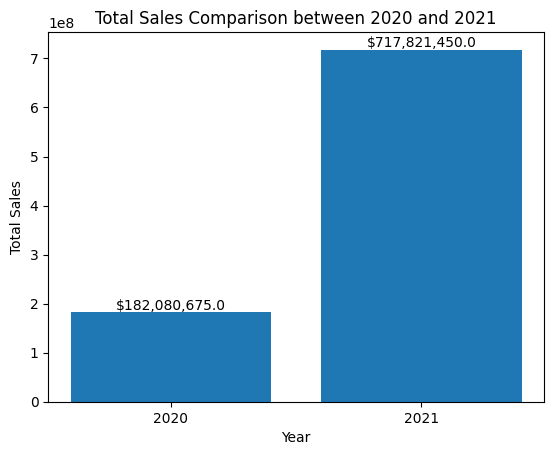

In [ ]:
categories = ["2020", "2021"]
sales = [total_sales_2020, total_sales_2021]  # Replace with your actual sales data

# Create a bar chart
plt.bar(categories, sales)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Total Sales Comparison between 2020 and 2021")

for i, sale in enumerate(sales):
    plt.text(i, sale + 50, f"${sale:,}", ha='center', va='bottom', fontsize=10)

plt.show()


*   Total sales 2020 is 182.080.675 dollars
*   Total sales 2021 is 717.821.450 dollars


*   => total sale experienced the significant increase from 2020 to 2021 by 294% increase compared to 2020.
*  => See the bar chart below:





### MARKET SHARE OF AREA
Task: Comparing the Area sales in map and find which is the largest sale area.

In [ ]:
#show total order for each region:

adidas['Region'].unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

In [23]:
#Use map to show total order of each region - 2021
state_2021 = adidas[adidas["Invoice Date"].dt.year == 2021]

state_order_2021 = state_2021["State"].value_counts()

state_order_2021






California        369
Utah              216
Vermont           216
Massachusetts     216
Rhode Island      216
Connecticut       216
Oklahoma          216
Arkansas          216
Mississippi       216
New Mexico        216
Arizona           216
Idaho             216
Louisiana         216
Oregon            216
Georgia           216
New Hampshire     216
Virginia          216
Texas             216
Florida           216
Tennessee         216
Alabama           216
Pennsylvania      201
West Virginia     144
Iowa              144
Wisconsin         144
Indiana           144
New Jersey        144
Maryland          144
Delaware          144
South Dakota      144
Montana           144
North Dakota      144
Michigan          144
Kansas            144
Missouri          144
Maine             144
Kentucky          144
Ohio              144
North Carolina    144
South Carolina    144
Illinois          144
Alaska            144
Hawaii            144
New York          144
Wyoming           144
Nebraska  

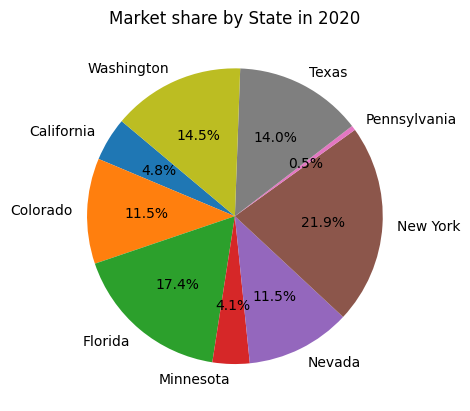

In [59]:
#Calculating the Area Sales as State -2020 by group data and extract data for year of 2020

state_sales_2020 = sales_2020.groupby ("State")["Total Sales"].sum()
state_sales_2020

#Calcualte the market share of State:
market_share_state20 = (state_sales_2020 / total_sales_2020)*100

market_share_state20

labels = state_sales_2020.index
sizes = market_share_state20
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 140)


plt.title("Market share by State in 2020")
plt.show()


In [13]:
#Calculating the Area Sales as State -2021 by group data and extract data for year of 2021. Have to use map because there are alot of state. can't fit in pie chart

state_sales_2021 = sales_2021.groupby ("State")["Total Sales"].sum()
state_sales_2021

#Calcualte the market share of State:
market_share_state21 = (state_sales_2021 / total_sales_2021)*100

market_share_state21

#CHƯA NGHĨ RA DÙNG CHART GÌ???/ THUI TIẾP THEO CHỈ PHÂN TÍCH 2021 THÔI. MỎI QUÁ

#MAYBE DÙNG CHOROPLETH - MAI TÍNH



State
Alabama           2.456520
Alaska            2.055261
Arizona           2.198628
Arkansas          1.760793
California        7.169574
Connecticut       1.612302
Delaware          1.713297
Florida           3.856509
Georgia           2.646545
Hawaii            3.104178
Idaho             2.685470
Illinois          1.364892
Indiana           1.230974
Iowa              1.034242
Kansas            1.389324
Kentucky          1.403253
Louisiana         3.308731
Maine             1.281095
Maryland          1.080778
Massachusetts     1.543115
Michigan          2.594717
Mississippi       2.172087
Missouri          1.348980
Montana           2.188690
Nebraska          0.825977
New Hampshire     2.286316
New Jersey        1.383944
New Mexico        2.767404
New York          3.403047
North Carolina    3.337394
North Dakota      1.077647
Ohio              2.575095
Oklahoma          1.479579
Oregon            2.974232
Pennsylvania      1.310778
Rhode Island      1.176728
South Carolina    4.07

In [ ]:
#State - level sale

### SALES BY RETAILER - 2021


In [19]:
#Extracting data 2021:
#Group by data following Retailers
retailer_sales_2021 = sales_2021.groupby ("Retailer")["Total Sales"].sum().sort_values(ascending =False)
retailer_sales_2021



Retailer
Foot Locker      177217915.0
Sports Direct    167209896.0
West Gear        152665067.0
Kohl's           101356250.0
Amazon            77698912.0
Walmart           41673410.0
Name: Total Sales, dtype: float64

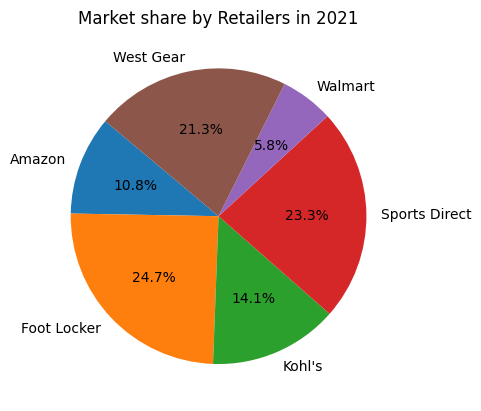

In [16]:
#Calculate market share
market_share_retailer21 = (retailer_sales_2021 / total_sales_2020)*100

market_share_retailer21

labels = retailer_sales_2021.index
sizes = market_share_retailer21
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 140)


plt.title("Market share by Retailers in 2021")
plt.show()

In [ ]:
#Showing total sales of Retailer each month in 2021:
#Groupby month
monthly_sales = sales_2021.groupby(["Retailer", sales_2021["Invoice Date"].dt.month])["Total Sales"].sum().reset_index()

#Rename month column:
monthly_sales.rename(columns={"Invoice Date": "Month"}, inplace=True)

#Create a line chart using Plotly Express:
fig = px.line(monthly_sales, x="Month", y="Total Sales", color="Retailer",
              title="Monthly Total Sales of Retailer  in 2021")

fig.show()

From the charts, we can see Retailer Foot Locker, West Gear, Sport Direct have the highest market share, 24.7%, 23.3% and 21.3% respectively. And Walmart is smalest market share with about 5%

### PRODUCT ANALYSIS:

In [64]:
#how many product and nam - 2021
product_2021 = adidas[adidas["Invoice Date"].dt.year == 2021]
product_sales_2021 = product_2021.groupby("Product")["Units Sold"].sum()
product_rev_2021=product_2021.groupby("Product")["Total Sales"].sum()
product_sales_2021

Product
Men's Apparel                245456
Men's Athletic Footwear      353766
Men's Street Footwear        494134
Women's Apparel              353619
Women's Athletic Footwear    253059
Women's Street Footwear      316478
Name: Units Sold, dtype: int64

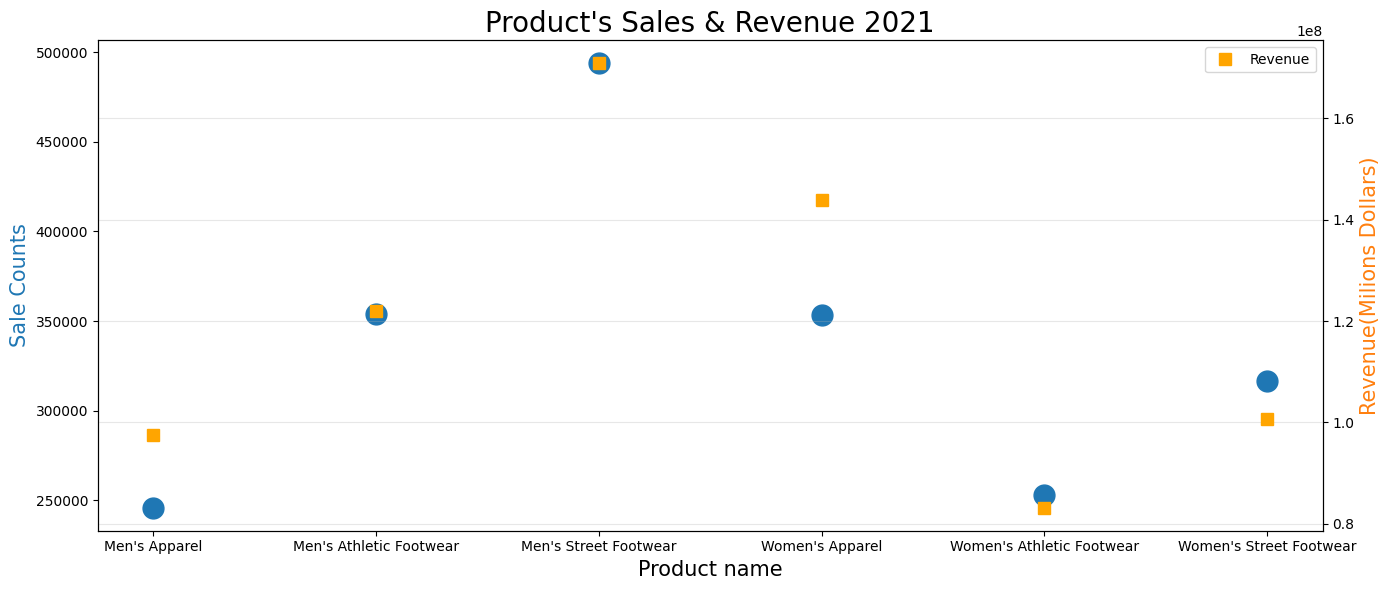

In [62]:
#Visual product's sale and revenue 2021:
plt.figure(figsize=(14,6))
#Creating the primary axis for sales:
ax1 =plt.gca()
ax1.plot(product_sales_2021.index, product_sales_2021.values, linestyle='none', markersize=15, marker='o')
ax1.set_xlabel('Product name', fontsize=15)
ax1.set_ylabel('Sale Counts', fontsize=15, color='tab:blue')

# Creat second axis for revenue:
ax2=ax1.twinx()

ax2.plot(product_rev_2021.index, product_rev_2021.values, linestyle='none', markersize=8, marker='s', label='Revenue', color='orange')
plt.xticks(rotation=90)

ax2.set_ylabel('Revenue(Milions Dollars)', fontsize=15, color ='tab:orange')


plt.title("Product's Sales & Revenue 2021", fontsize=20)
#Adding legend.
plt.legend()

plt.grid(alpha=0.3)
plt.margins(0.05)
plt.tight_layout()
plt.show()


The most successful product is men's street footwear.


### PRODUCT AND RETAILERS

<Figure size 1200x600 with 0 Axes>

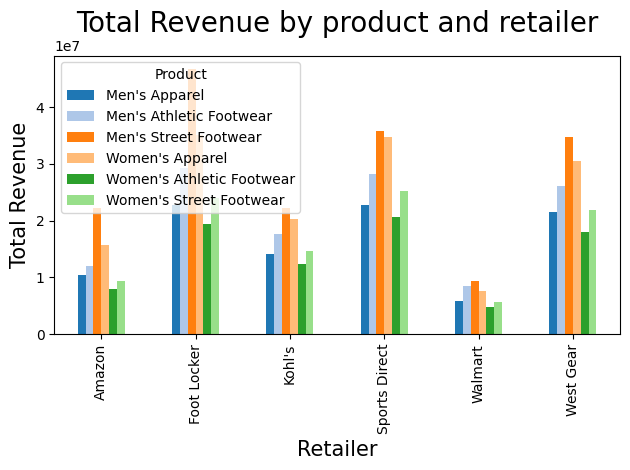

In [79]:
#Creating revenue of each product in each retailer
product_rev21 = product_2021.groupby(["Retailer","Product"])["Total Sales"].sum()
product_rev21
#Visual:
product_colors = plt.cm.tab20.colors[:len(product_2021["Product"].unique())]
plt.figure(figsize=(12,6))

ax = product_rev21.unstack(level=1).plot(kind='bar', color=product_colors)

plt.title('Total Revenue by product and retailer', fontsize = 20)
plt.xlabel("Retailer", fontsize=15)
plt.ylabel("Total Revenue", fontsize=15)

plt.tight_layout()
plt.show()